<h1><b> Facial Expression </b></h1>

In [34]:
# importing the required modules 
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [3]:
train_dataset = train.flow_from_directory('Train' ,
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode = 'categorical')

Found 150 images belonging to 3 classes.


In [4]:
validation_dataset = train.flow_from_directory('Test' ,
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode = 'categorical')


Found 32 images belonging to 3 classes.


In [5]:
train_dataset.class_indices

{'angry': 0, 'happy': 1, 'sad': 2}

<h1> Model </h1>


In [8]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation = 'relu' , input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(256,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(256,activation = 'relu'),
                                    
                                    tf.keras.layers.Dense(128,activation = 'relu'),
                                    
                                    tf.keras.layers.Dense(3, activation = 'softmax'),

]     )


In [9]:
model.compile(loss='binary_crossentropy',
#               optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
              optimizer = 'adam',
              metrics=['accuracy']
)

In [10]:
model_fit = model.fit(train_dataset,
                      epochs = 20,
                      validation_data = validation_dataset)

Epoch 1/20
50/50 [==============================] - 14s 234ms/step - loss: 0.6597 - accuracy: 0.3067 - val_loss: 0.6392 - val_accuracy: 0.4375
Epoch 2/20
50/50 [==============================] - 11s 228ms/step - loss: 0.6405 - accuracy: 0.3000 - val_loss: 0.6355 - val_accuracy: 0.2812
Epoch 3/20
50/50 [==============================] - 12s 234ms/step - loss: 0.6386 - accuracy: 0.3200 - val_loss: 0.6336 - val_accuracy: 0.4375
Epoch 4/20
50/50 [==============================] - 11s 229ms/step - loss: 0.6399 - accuracy: 0.3267 - val_loss: 0.6355 - val_accuracy: 0.2812
Epoch 5/20
50/50 [==============================] - 11s 228ms/step - loss: 0.6381 - accuracy: 0.2933 - val_loss: 0.6334 - val_accuracy: 0.4375
Epoch 6/20
50/50 [==============================] - 11s 228ms/step - loss: 0.6377 - accuracy: 0.3133 - val_loss: 0.6441 - val_accuracy: 0.2812
Epoch 7/20
50/50 [==============================] - 11s 228ms/step - loss: 0.6386 - accuracy: 0.3333 - val_loss: 0.6343 - val_accuracy: 0.3125

In [15]:
model.save_weights("model.h5")

In [37]:
img = cv2.imread('happy.jpg')
img.shape
img=cv2.resize(img,(200,200))
img.shape

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
val=model.predict(images)
print(val)
t = np.argmax(val)

if t == 0:
    print("angry")
elif t == 1:
    print("Happy")
else:
    print("Sad")

1/1 [==============================] - 0s 46ms/step
[[1. 0. 0.]]
angry


<h1>Angry</h1>

In [38]:
angry_path = ('Test/angry')


1/1 [==============================] - 0s 60ms/step


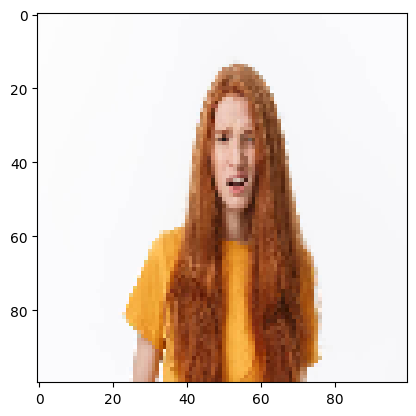

angry


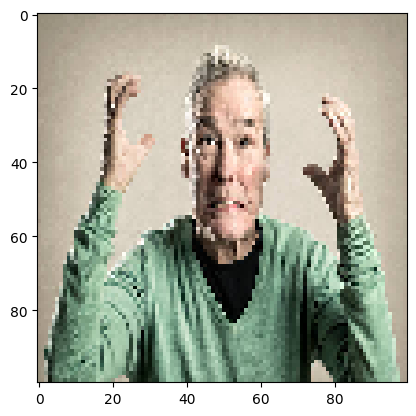

angry


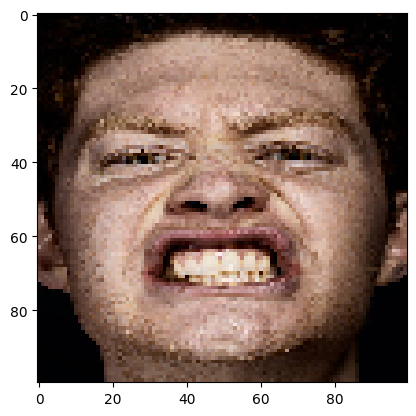

angry


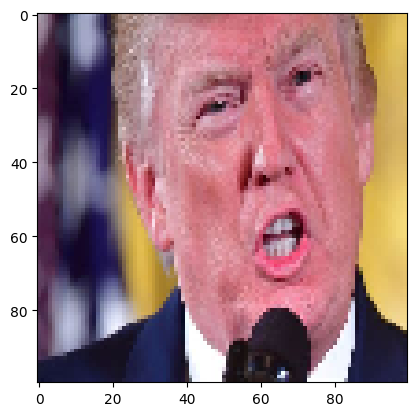

Sad


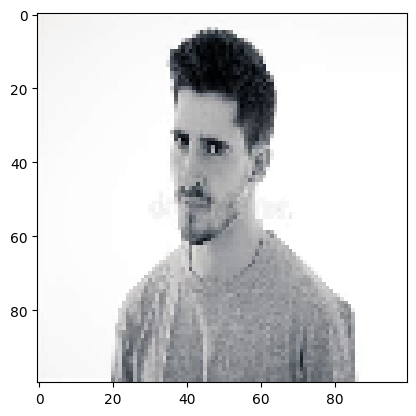

Sad


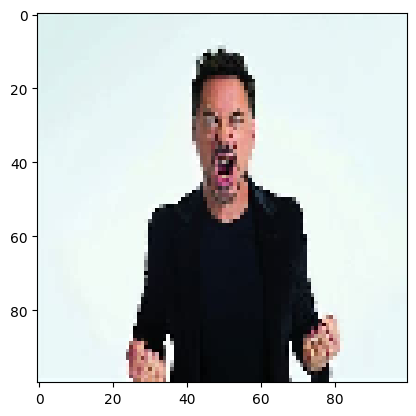

angry


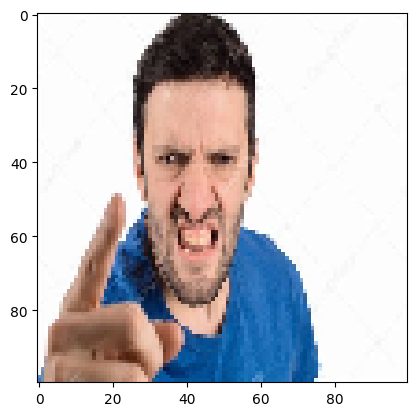

happy


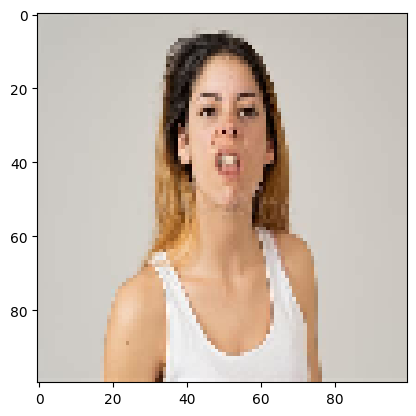

angry


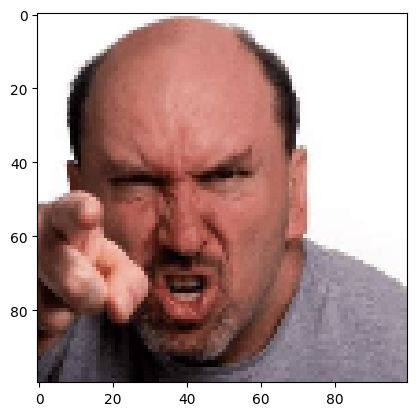

Sad


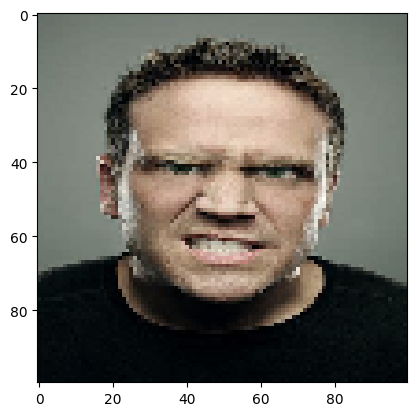

angry


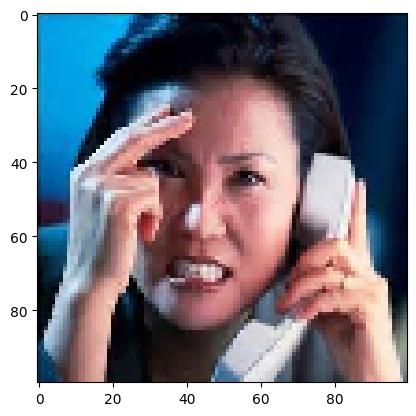

angry


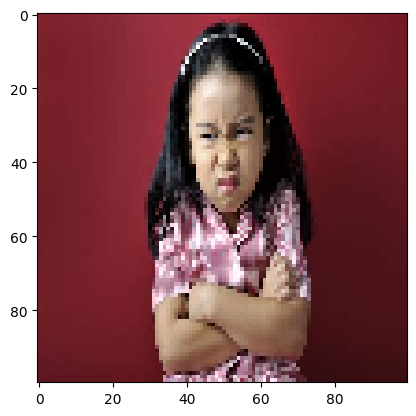

angry


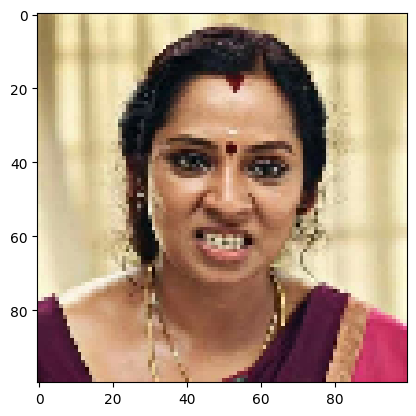

angry


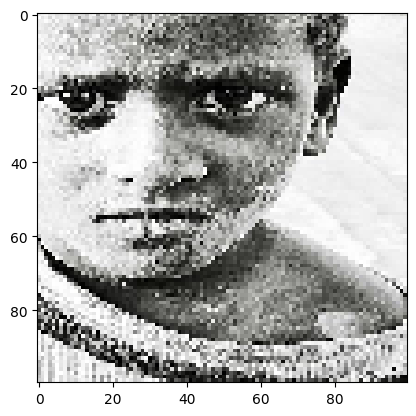

angry


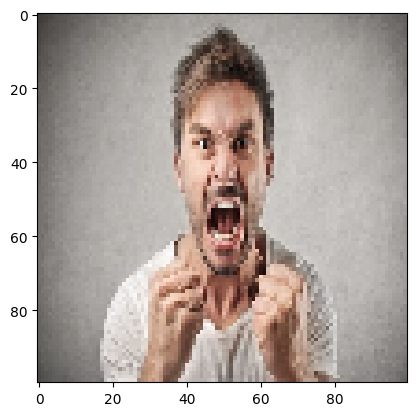

happy


In [39]:
op_list_angry = []
for i in os.listdir(angry_path):
    img = image.load_img(angry_path +'//'+i ,target_size=(200,200))
#     plt.imshow(img)
#     plt.show()

    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val=model.predict(images)
    t = np.argmax(val)
    op_list_angry.append(t)
n=0  
for i in os.listdir(angry_path):
    img = image.load_img(angry_path +'//'+i ,target_size=(100,100))
    plt.imshow(img)
    plt.show()
    
    if op_list_angry[n] == 0:
        print("angry")
    elif op_list_angry[n] == 1:
        print("happy")
    else:
        print("Sad")     
    n+=1


In [48]:
count = 0
print(len(op_list_angry))
for i in op_list_angry:
    print(i)
    if i == 0:
        count+=1
print(count)

15
0
0
0
2
2
0
1
0
2
0
0
0
0
0
1
10


<h1> Happy </h1>

In [41]:
happy_path = ('Test/happy')

1/1 [==============================] - 0s 63ms/step


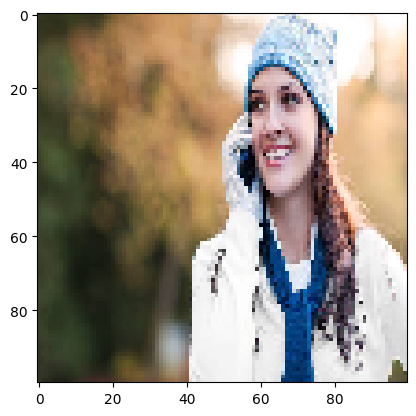

happy


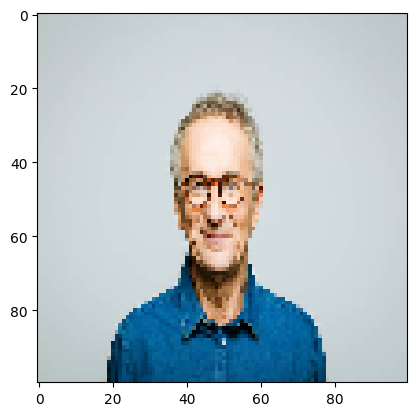

happy


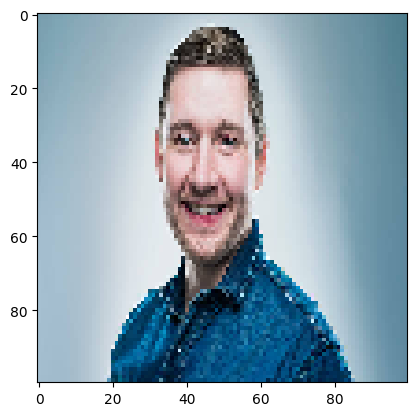

happy


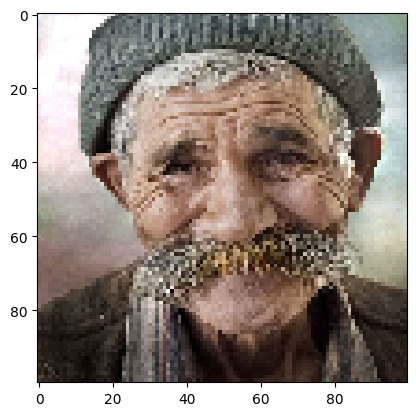

angry


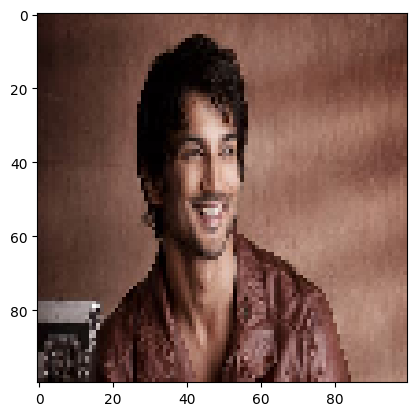

happy


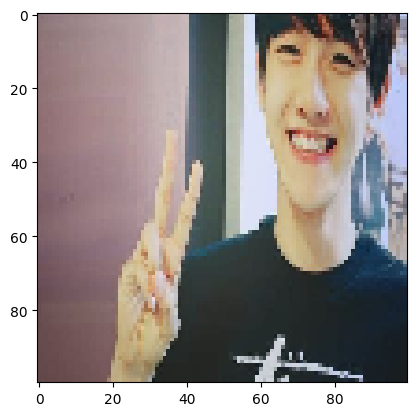

angry


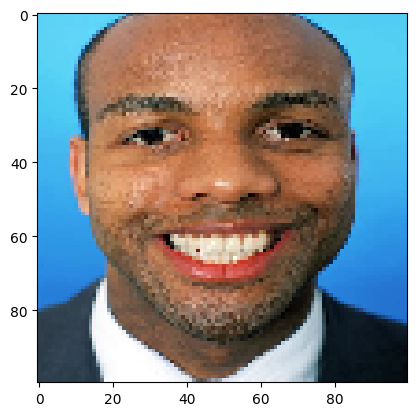

happy


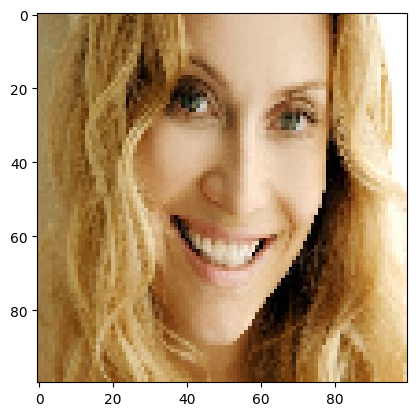

happy


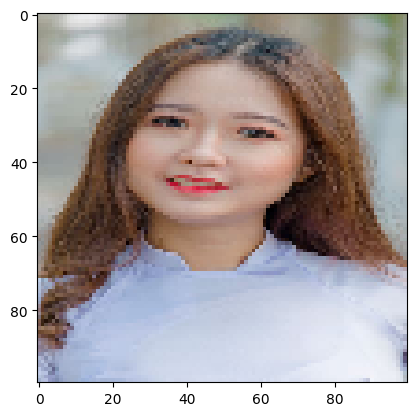

angry


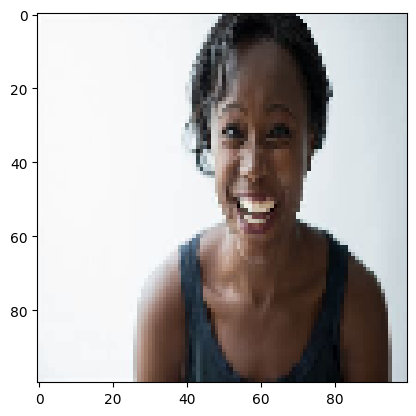

angry


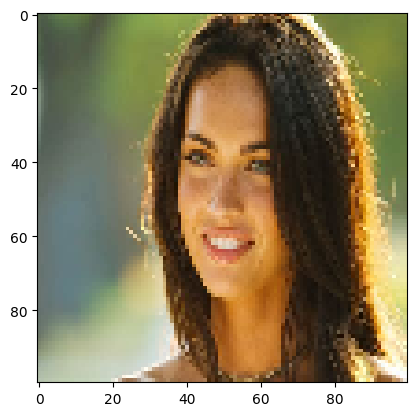

happy


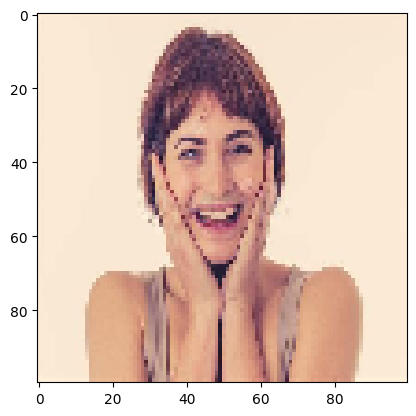

Sad


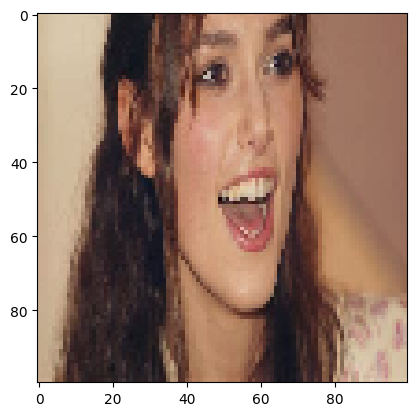

angry


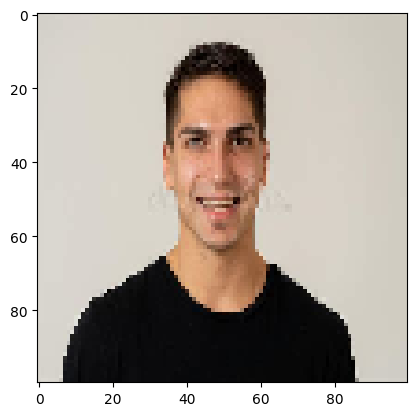

happy


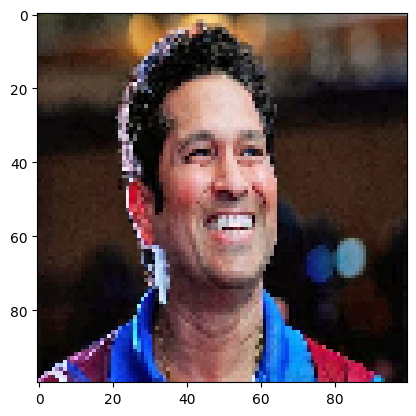

angry


In [42]:
op_list_happy = []
for i in os.listdir(happy_path):
    img = image.load_img(happy_path +'//'+i ,target_size=(200,200))
#     plt.imshow(img)
#     plt.show()

    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val=model.predict(images)
    t = np.argmax(val)
    op_list_happy.append(t)
n=0  
for i in os.listdir(happy_path):
    img = image.load_img(happy_path +'//'+i ,target_size=(100,100))
    plt.imshow(img)
    plt.show()
    
    if op_list_happy[n] == 0:
        print("angry")
    elif op_list_happy[n] == 1:
        print("happy")
    else:
        print("Sad")     
    n+=1


In [49]:
count = 0
print(len(op_list_happy))
for i in op_list_happy:
    print(i)
    if i == 1:
        count+=1
print(count)

15
1
1
1
0
1
0
1
1
0
0
1
2
0
1
0
8


<h1>Sad</h1>

In [44]:
sad_path = ('Test/sad')

1/1 [==============================] - 0s 48ms/step


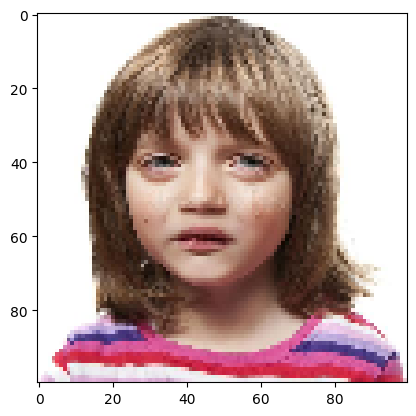

Sad


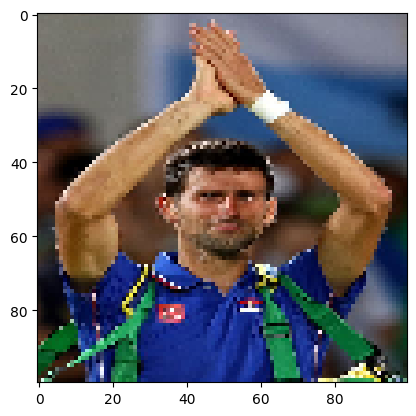

Sad


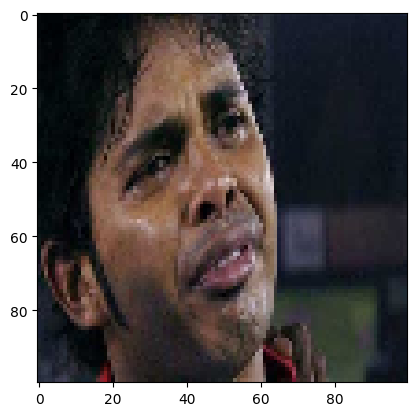

Sad


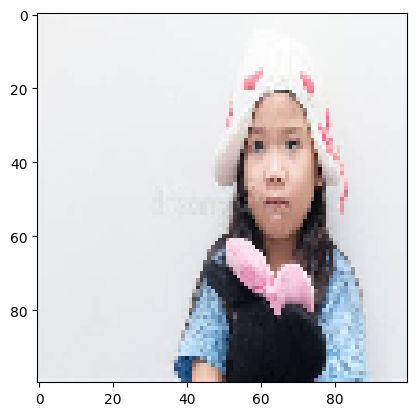

happy


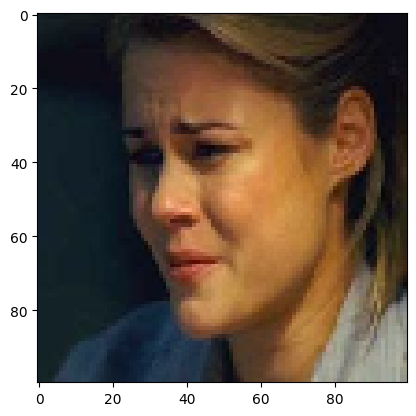

Sad


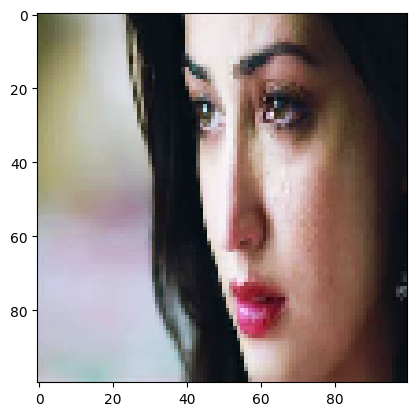

happy


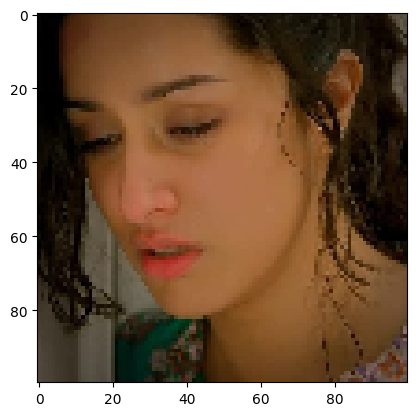

Sad


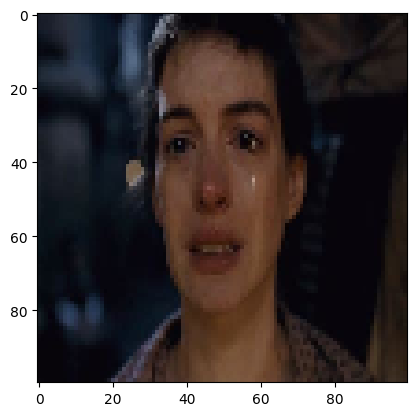

angry


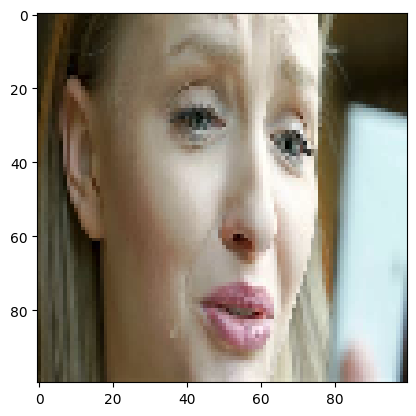

Sad


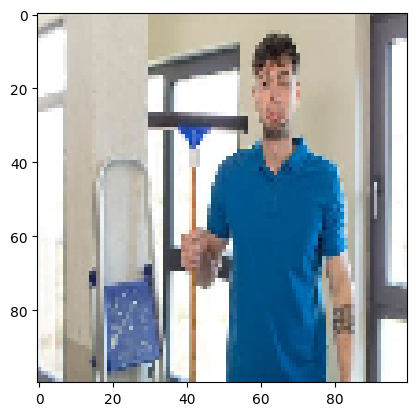

angry


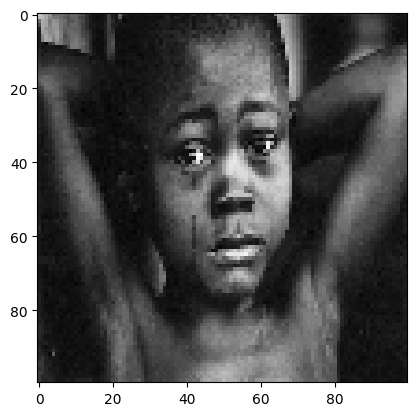

angry


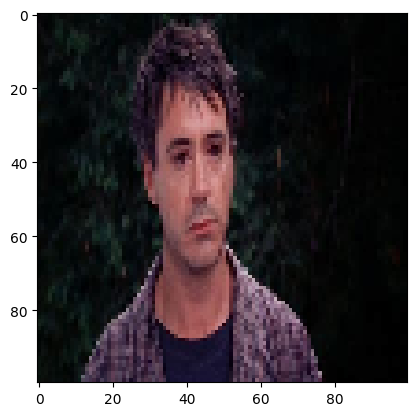

angry


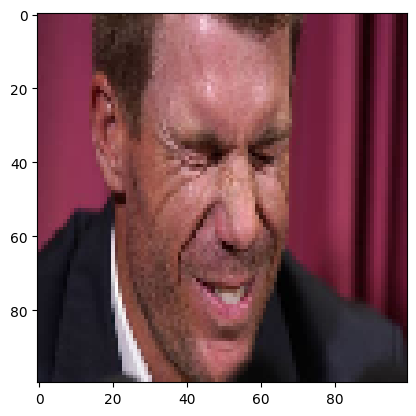

Sad


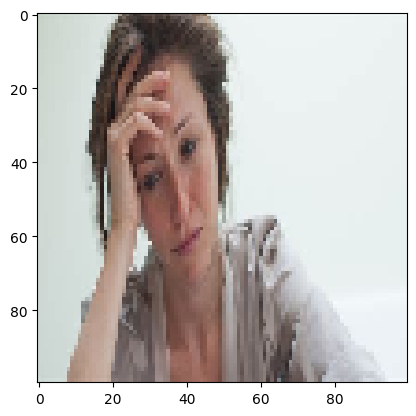

angry


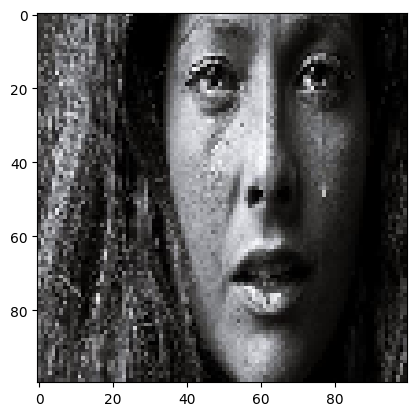

angry


In [45]:
op_list_sad = []
for i in os.listdir(sad_path):
    img = image.load_img(sad_path +'//'+i ,target_size=(200,200))
#     plt.imshow(img)
#     plt.show()

    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val=model.predict(images)
    t = np.argmax(val)
    op_list_sad.append(t)
n=0  
for i in os.listdir(sad_path):
    img = image.load_img(sad_path +'//'+i ,target_size=(100,100))
    plt.imshow(img)
    plt.show()
    
    if op_list_sad[n] == 0:
        print("angry")
    elif op_list_sad[n] == 1:
        print("happy")
    else:
        print("Sad")     
    n+=1


In [47]:
count = 0
print(len(op_list_sad))
for i in op_list_sad:
    print(i)
    if i == 2:
        count+=1
print(count)

15
2
2
2
1
2
1
2
0
2
0
0
0
2
0
0
7
